In [32]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spacy import displacy
from termcolor import colored
from extraction import findSVOs
import en_core_web_lg
import networkx as nx
import matplotlib.pyplot as plt
from topic_modelling import get_topics
import time

nlp = en_core_web_lg.load()

In [24]:
colors = ['skyblue', 'red', 'yellow']

In [23]:
def create_graph(final_nodes, cnt):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = (final_nodes[i][0])
        ent2 = (final_nodes[i][2])
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    print("\nTotal number of extracted pairs:", len(edge))
    print("\nEdges: ", edge)
    print("\nEntities: ", final_nodes)
    if(len(edge)==0 or len(final_nodes)==0):
        print('False')
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i],target[i],i)])
        print("\nGraph generated")
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize=(size,size))
        edge_labels=dict([((u,v,),edge[d['weight']]) for u,v,d in G.edges(data=True)])
        pos = nx.spring_layout(G,k=0.8)
        nx.draw(G, with_labels=True, node_color=colors[cnt], node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=15)
        return G

Topic:  0
['On February 1, 2021, Judge Denise L. Cote of the U.S. District Court for the Southern District of New York entered a partial judgment against David Hu, the co-founder and chief investment officer of International Investment Group (IIG), a formerly registered investment adviser, enjoining Hu from violating the antifraud provisions of the federal securities laws.', 'The complaint, filed on July 17, 2020, charges Hu with violating Section 17(a) of the Securities Act of 1933, Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder, and Sections 206(1) and 206(2) of the Investment Advisers Act of 1940.', 'On March 30, 2020, the SEC obtained a final judgment on consent enjoining IIG from violating the antifraud provisions of the federal securities laws and requiring IIG to pay more than $35 million in disgorgement and prejudgment interest.']
Topic:  1
["As alleged, Hu grossly overvalued the assets in IIG's flagship hedge fund, resulting in the fund paying i

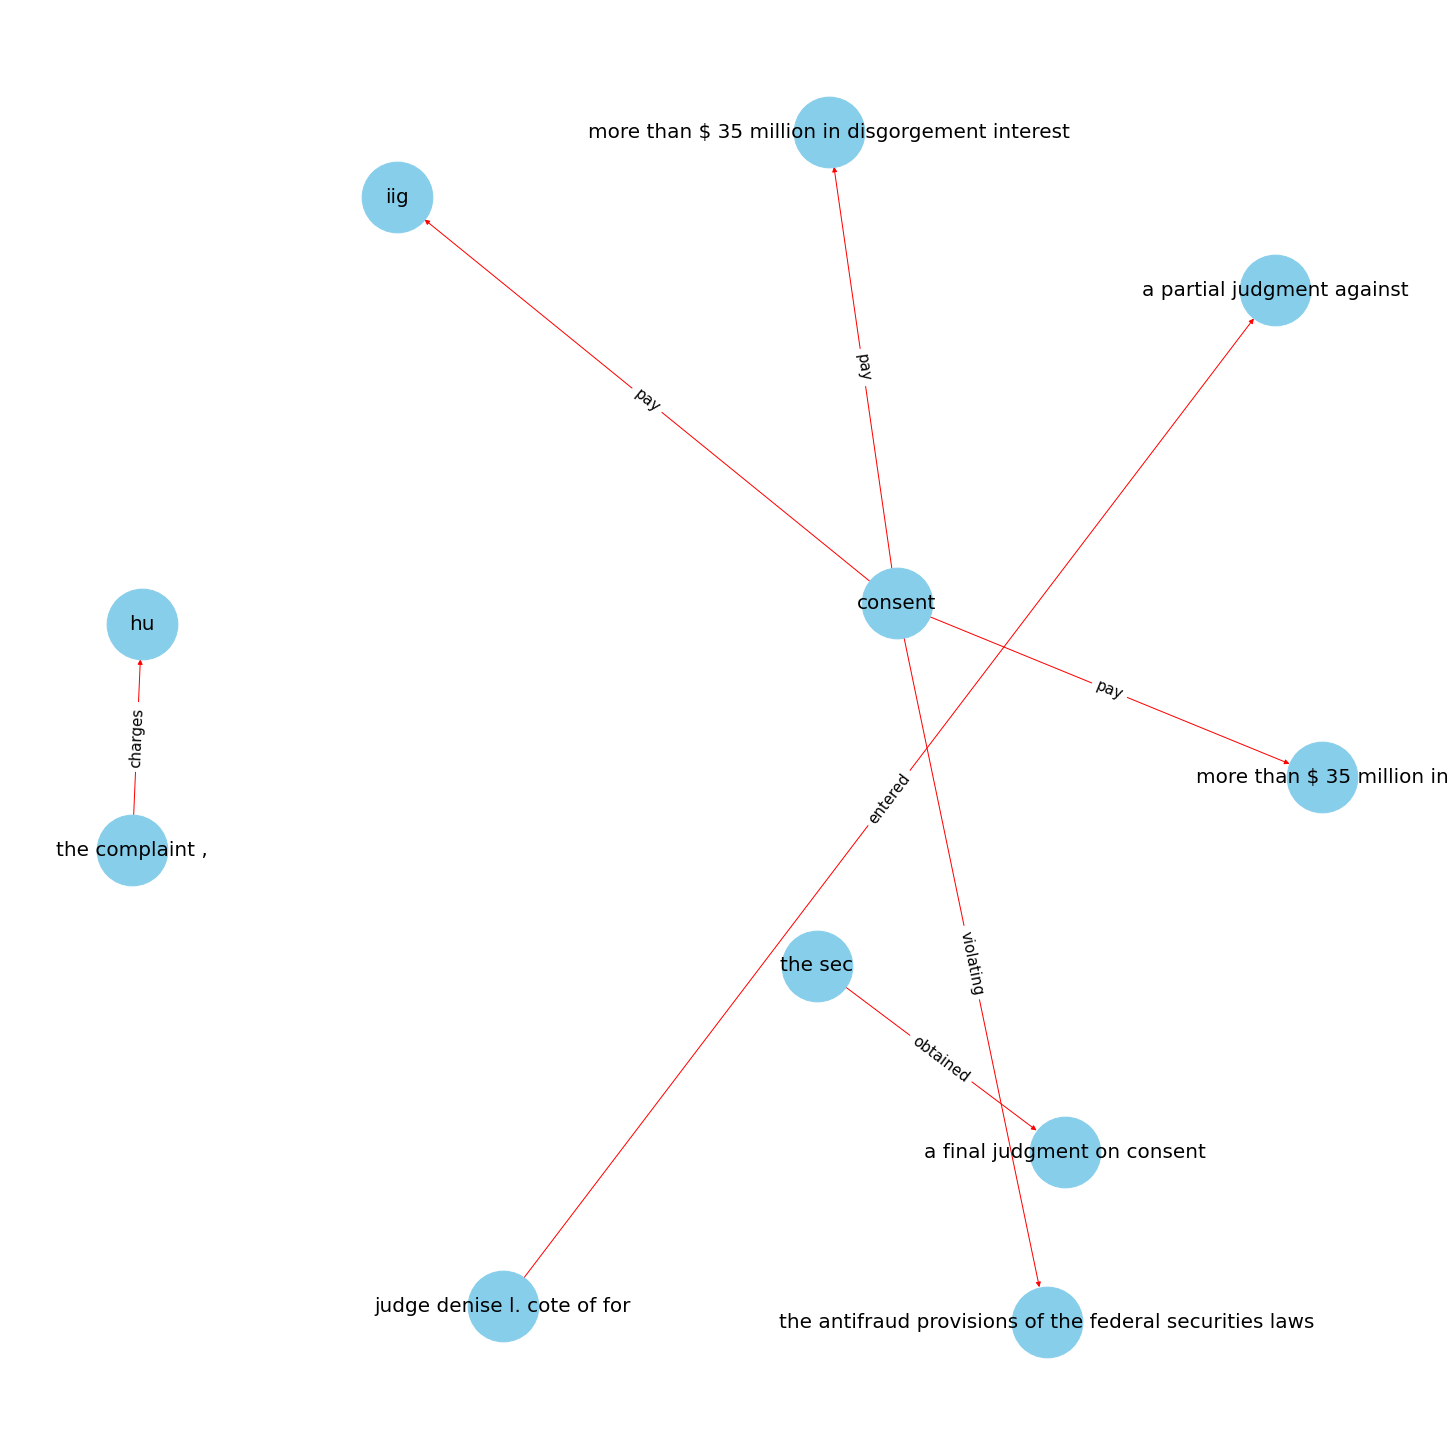

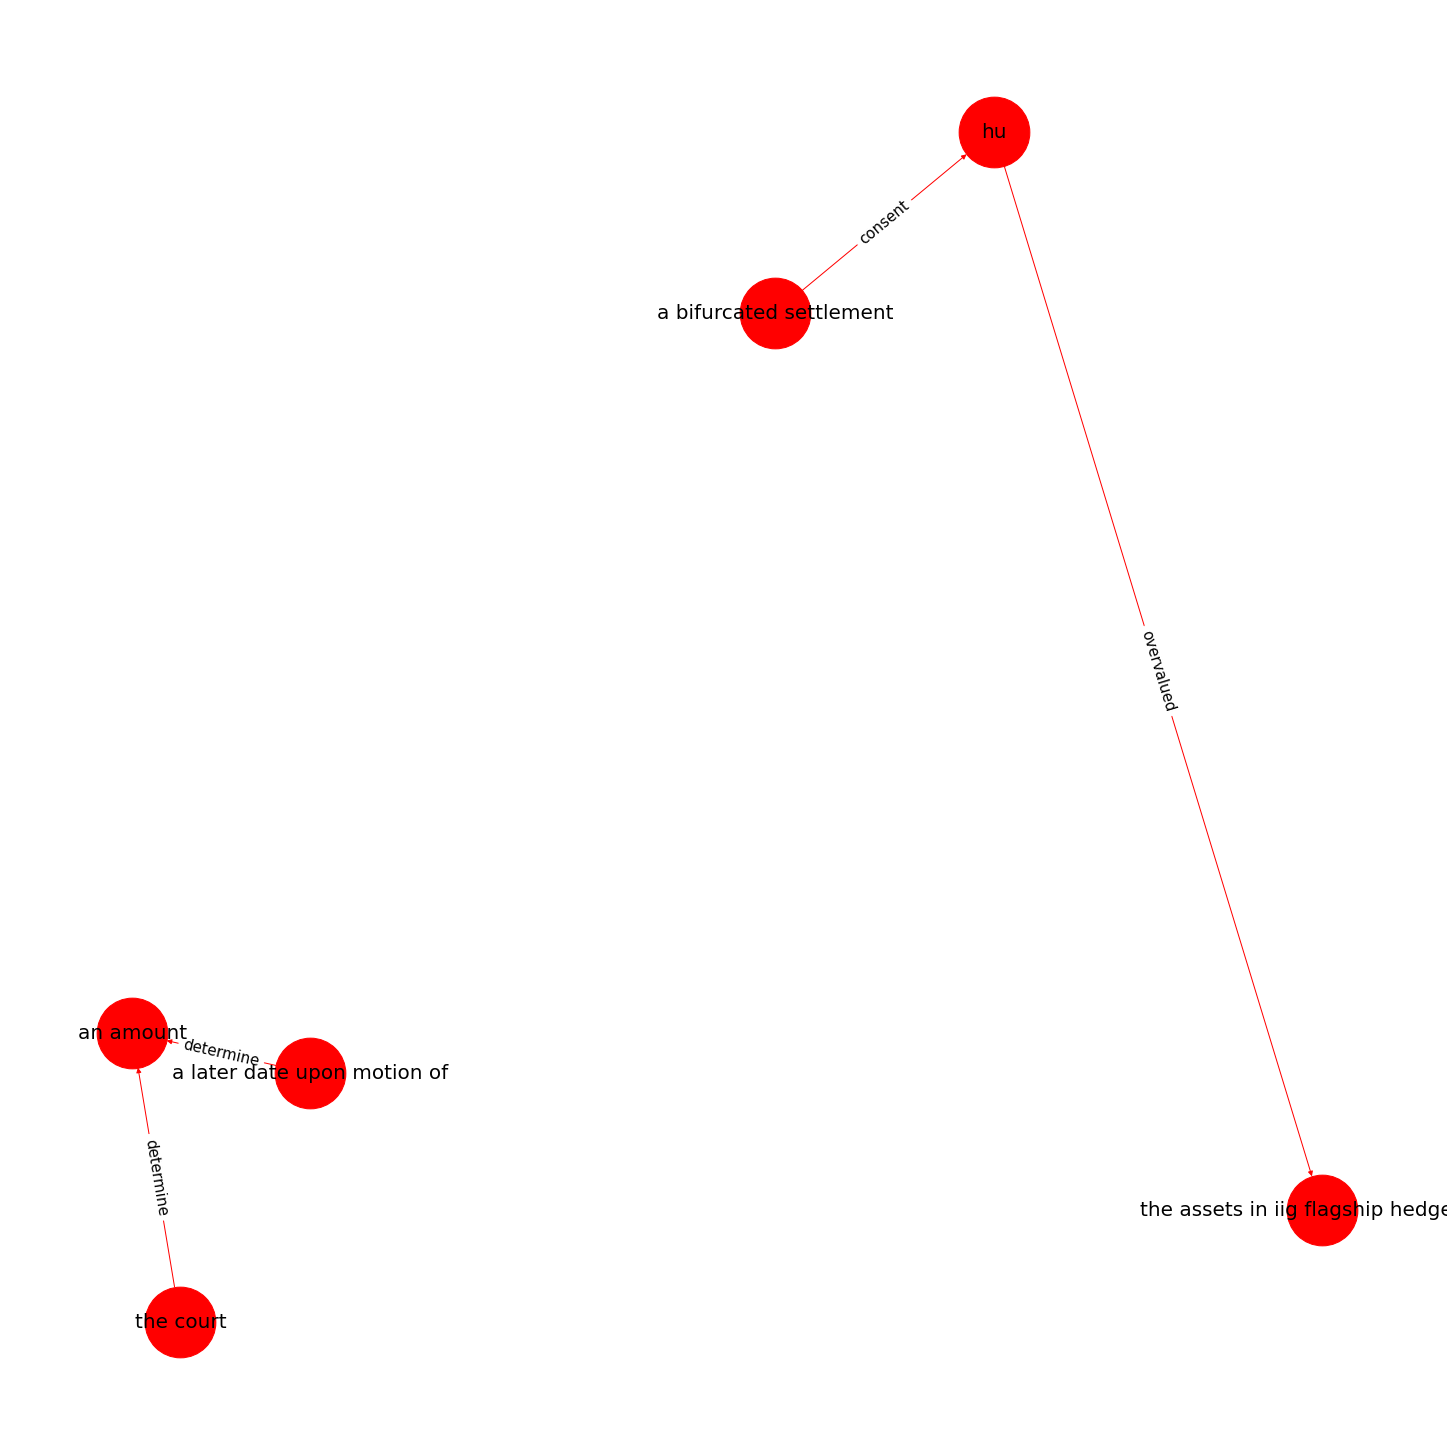

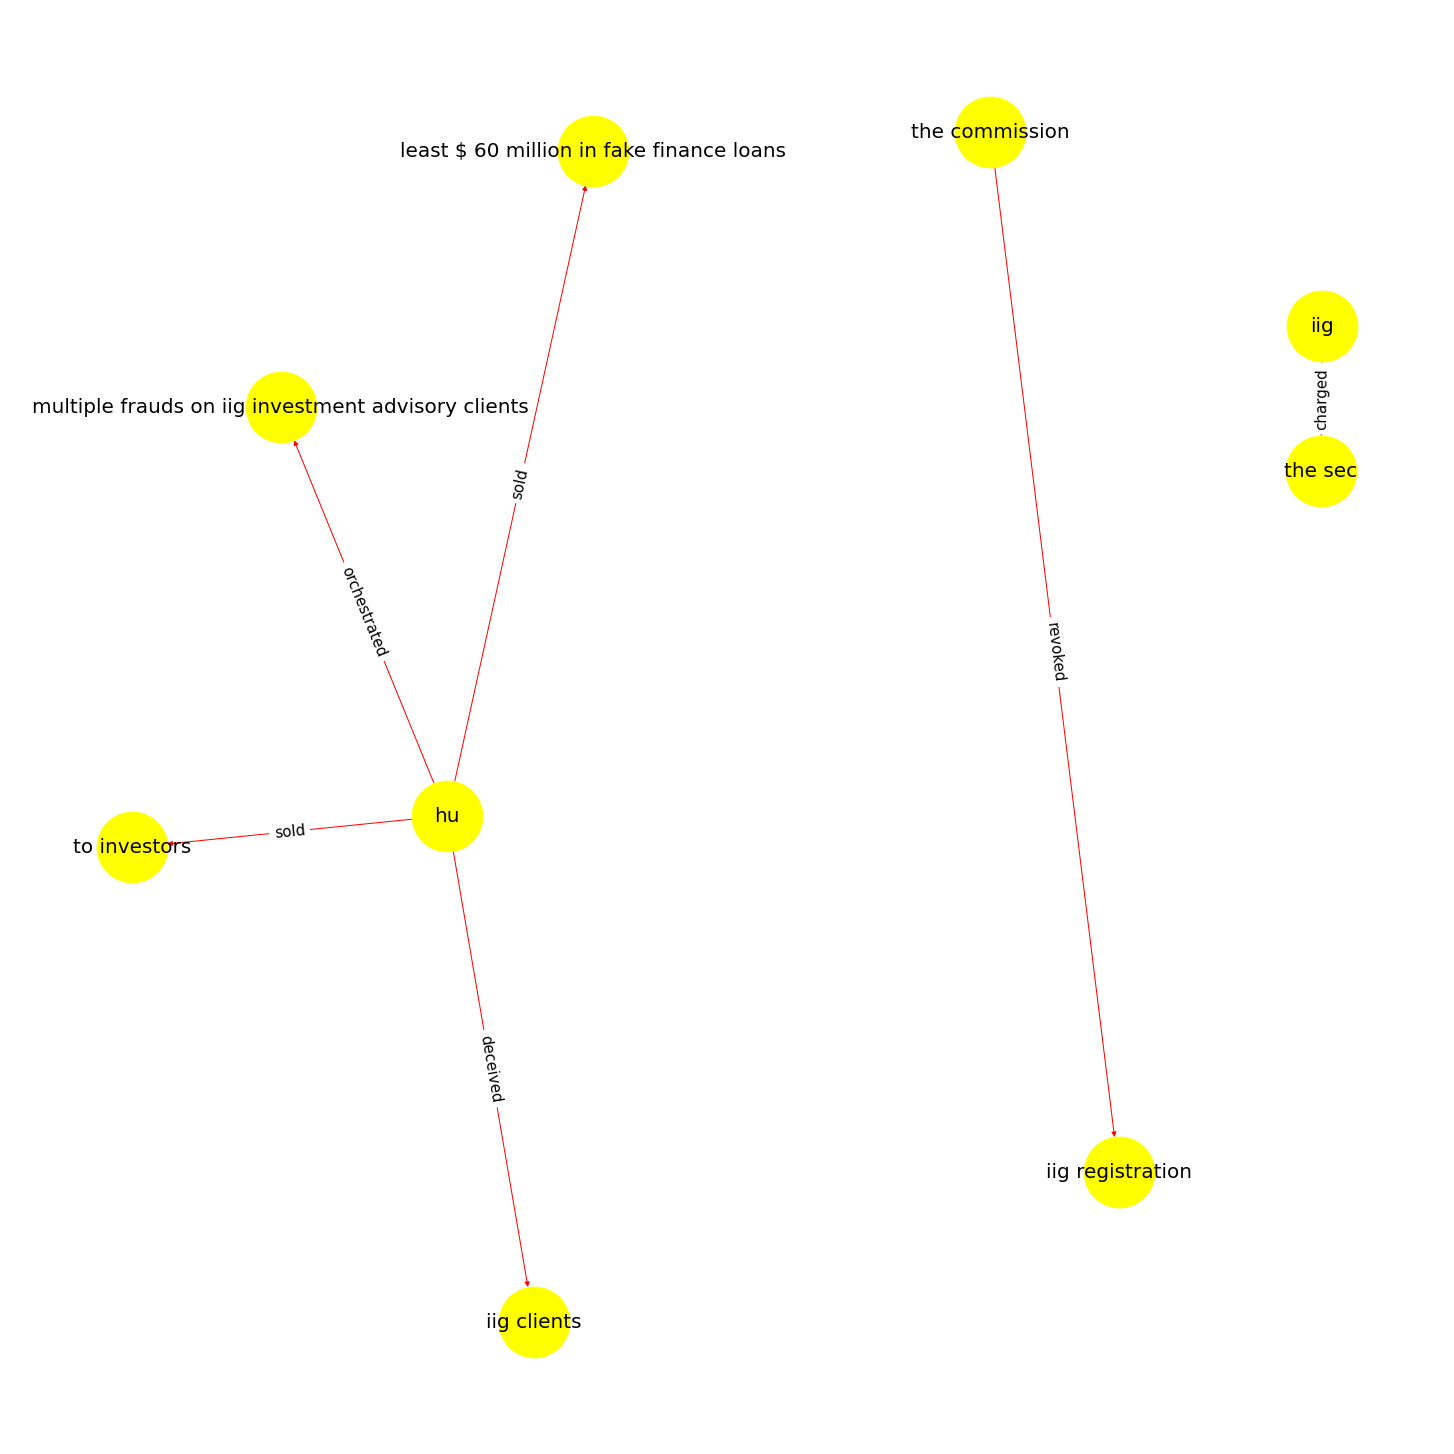

In [54]:
no_of_topics = 3
topics = get_topics('docs/text3.txt', no_of_topics)
cnt=-1

for i in topics:
    cnt+=1
    final_nodes = []
    nodes = []
    for sentence in topics[i]: 
        tokens = nlp(sentence)
        svos = findSVOs(tokens)
        nodes.append(svos)
    for i in nodes:
        for j in i:
            if(len(j) == 3):
                final_nodes.append(j)
    (create_graph(final_nodes, cnt))
    name = str(time.time())
    plt.savefig('./images/' + name + '.png')